In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import csv
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from random import seed
from random import randint
import matplotlib.pyplot as plt
import seaborn as sns


#MultiClass Classification

## 50 Agree

In [ ]:
#load train e test
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_50Agree.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set.txt'
delimiter = ','

In [ ]:
#train/test split
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])
  


In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(4264, 4264, 1454, 1454)

In [ ]:
%%time
pipeline = Pipeline([
    ('vect', CountVectorizer()),  # feature extraction
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

classifier = pipeline.fit(x_train,y_train)
predictions = classifier.predict(x_test)
correct = 0
for prediction,true_label in zip(predictions, y_test):
    if prediction==true_label:
        correct += 1
print(correct/len(predictions))

0.7929848693259972
CPU times: user 156 ms, sys: 1.46 ms, total: 157 ms
Wall time: 175 ms


In [ ]:
print('Classification report:')
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)

Classification report:
              precision    recall  f1-score   support

    negative       0.85      0.47      0.61       179
     neutral       0.77      1.00      0.87       872
    positive       0.89      0.49      0.63       403

    accuracy                           0.79      1454
   macro avg       0.84      0.65      0.70      1454
weighted avg       0.81      0.79      0.77      1454



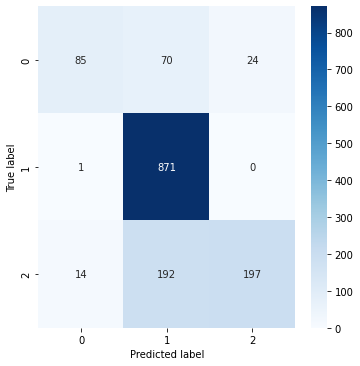

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count, CountVectorizer 
                                  # converts a collection of text documents to a matrix of token counts

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((1454, 1847), (4264, 1847))

In [ ]:
# feature selection, SelectKBest selects features according to the k highest scores
sel = SelectKBest(chi2, k='all')  
sel.fit(X_train_tok,y_train)
X_train_sel = sel.transform(X_train_tok)
X_test_sel = sel.transform(X_test_tok)

In [ ]:
# weighting, TfidfTransformer() transforms a count matrix to a normalized tf or tf-idf representation
tfidf = TfidfTransformer()  
tfidf.fit(X_train_sel)
X_train_vec = tfidf.transform(X_train_sel)
X_test_vec =tfidf.transform(X_test_sel)

In [ ]:
# linear svm with default parameters
%%time
learner = LinearSVC()  
classifier = learner.fit(X_train_vec,y_train)
predictions = classifier.predict(X_test_vec)

CPU times: user 34.9 ms, sys: 693 µs, total: 35.6 ms
Wall time: 36.7 ms


In [ ]:
print('Classification report:')
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)


Classification report:
              precision    recall  f1-score   support

    negative       0.83      0.49      0.61       179
     neutral       0.78      0.99      0.87       872
    positive       0.85      0.52      0.65       403

    accuracy                           0.79      1454
   macro avg       0.82      0.66      0.71      1454
weighted avg       0.81      0.79      0.78      1454



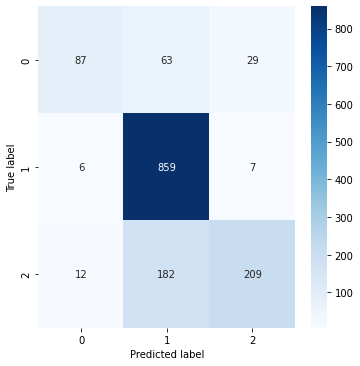

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",learner.predict(vect.transform([instance])))

company design manufacture market highquality clothing interior decoration textile bag accessory
Label: neutral
Predicted Label:  ['neutral']


In [ ]:
#sentiment prediction on random tweet

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",learner.predict(vect.transform([instance])))

company intends launch housing development acquired land plot construct 5000060 000 square metre housing per annum 2011
Label: neutral
Predicted Label:  ['neutral']


## 66 Agree

In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_66Agree.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set.txt'
delimiter = ','

In [ ]:
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])

In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(3723, 3723, 1454, 1454)

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((1454, 1688), (3723, 1688))

In [ ]:
# feature selection
sel = SelectKBest(chi2, k='all')  
sel.fit(X_train_tok,y_train)
X_train_sel = sel.transform(X_train_tok)
X_test_sel = sel.transform(X_test_tok)

In [ ]:
# weighting
tfidf = TfidfTransformer()  
tfidf.fit(X_train_sel)
X_train_vec = tfidf.transform(X_train_sel)
X_test_vec =tfidf.transform(X_test_sel)

In [ ]:
# linear svm with default parameters
%%time
learner = LinearSVC()  
classifier = learner.fit(X_train_vec,y_train)
predictions = classifier.predict(X_test_vec)

CPU times: user 55.8 ms, sys: 0 ns, total: 55.8 ms
Wall time: 59.3 ms


In [ ]:
print('Classification report:')
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)

Classification report:
              precision    recall  f1-score   support

    negative       0.81      0.47      0.60       179
     neutral       0.78      0.97      0.86       872
    positive       0.81      0.53      0.64       403

    accuracy                           0.79      1454
   macro avg       0.80      0.66      0.70      1454
weighted avg       0.79      0.79      0.77      1454



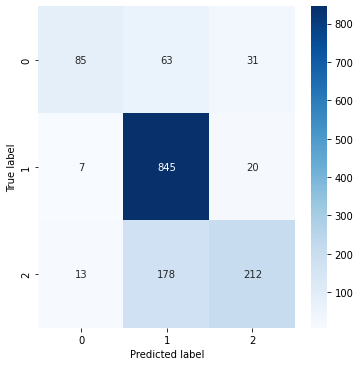

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet



value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",learner.predict(vect.transform([instance])))

sale finland decreased 105 january sale outside finland dropped 17
Label: negative
Predicted Label:  ['negative']


In [ ]:
#sentiment prediction on random tweet

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",learner.predict(vect.transform([instance])))

helsinki finland sept 18 2009 globe newswire ixonos plc expands company smartphone rd service establishes new nextgeneration smartphone design unit connection ixonos site jyvaeskylae
Label: positive
Predicted Label:  ['neutral']


In [ ]:
%time
pipeline = Pipeline([
    ('vect', CountVectorizer()),  # feature extraction
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

classifier = pipeline.fit(x_train,y_train)
predictions = classifier.predict(x_test)
correct = 0
for prediction,true_label in zip(predictions, y_test):
    if prediction==true_label:
        correct += 1
print(correct/len(predictions))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.3 µs
0.7895460797799174


In [ ]:
print('Classification report:')
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)


Classification report:
              precision    recall  f1-score   support

    negative       0.82      0.47      0.60       179
     neutral       0.78      0.98      0.87       872
    positive       0.83      0.51      0.63       403

    accuracy                           0.79      1454
   macro avg       0.81      0.66      0.70      1454
weighted avg       0.80      0.79      0.77      1454



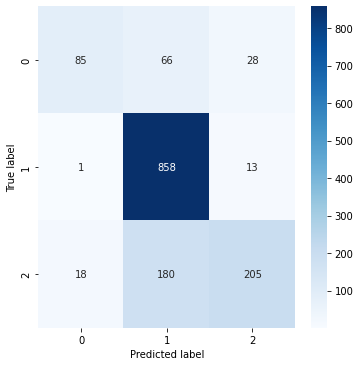

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 75 Agree

In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_75Agree.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set.txt'
delimiter = ','

In [ ]:
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])

In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(3061, 3061, 1454, 1454)

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((1454, 1407), (3061, 1407))

In [ ]:
# feature selection
sel = SelectKBest(chi2, k='all')  
sel.fit(X_train_tok,y_train)
X_train_sel = sel.transform(X_train_tok)
X_test_sel = sel.transform(X_test_tok)

In [ ]:
# weighting
tfidf = TfidfTransformer()  
tfidf.fit(X_train_sel)
X_train_vec = tfidf.transform(X_train_sel)
X_test_vec =tfidf.transform(X_test_sel)

In [ ]:
# linear svm with default parameters
%%time
learner = LinearSVC()  
classifier = learner.fit(X_train_vec,y_train)
predictions = classifier.predict(X_test_vec)

CPU times: user 41.6 ms, sys: 187 µs, total: 41.8 ms
Wall time: 47.8 ms


In [ ]:
print('Classification report:')
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)

Classification report:
              precision    recall  f1-score   support

    negative       0.75      0.44      0.56       179
     neutral       0.76      0.96      0.85       872
    positive       0.78      0.50      0.61       403

    accuracy                           0.77      1454
   macro avg       0.77      0.63      0.67      1454
weighted avg       0.77      0.77      0.75      1454



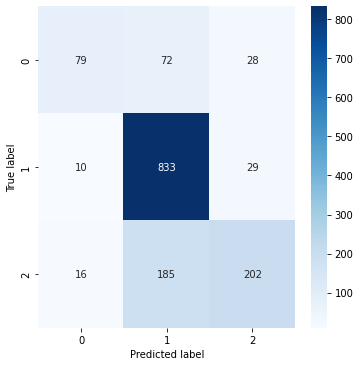

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",learner.predict(vect.transform([instance])))

interesting export market russia baltic country scandinavia
Label: neutral
Predicted Label:  ['neutral']


In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",learner.predict(vect.transform([instance])))

temporary layoff affecting entire workforce also implemented
Label: negative
Predicted Label:  ['neutral']


In [ ]:
%%time
pipeline = Pipeline([
    ('vect', CountVectorizer()),  # feature extraction
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

classifier = pipeline.fit(x_train,y_train)
predictions = classifier.predict(x_test)
correct = 0
for prediction,true_label in zip(predictions, y_test):
    if prediction==true_label:
        correct += 1
print(correct/len(predictions))

0.7723521320495186
CPU times: user 208 ms, sys: 0 ns, total: 208 ms
Wall time: 213 ms


In [ ]:
print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

    negative       0.76      0.44      0.56       179
     neutral       0.77      0.97      0.86       872
    positive       0.79      0.49      0.60       403

    accuracy                           0.77      1454
   macro avg       0.77      0.63      0.67      1454
weighted avg       0.77      0.77      0.75      1454

Confusion matrix:
[[ 78  68  33]
 [  4 849  19]
 [ 20 187 196]]


## All Agree

In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_AllAgree.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set.txt'
delimiter = ','

In [ ]:
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])

In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(2008, 2008, 1454, 1454)

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((1454, 959), (2008, 959))

In [ ]:
# feature selection
sel = SelectKBest(chi2, k='all')  
sel.fit(X_train_tok,y_train)
X_train_sel = sel.transform(X_train_tok)
X_test_sel = sel.transform(X_test_tok)

In [ ]:
# weighting
tfidf = TfidfTransformer()  
tfidf.fit(X_train_sel)
X_train_vec = tfidf.transform(X_train_sel)
X_test_vec =tfidf.transform(X_test_sel)

In [ ]:
# linear svm with default parameters
%%time
learner = LinearSVC()  
classifier = learner.fit(X_train_vec,y_train)
predictions = classifier.predict(X_test_vec)

CPU times: user 24.9 ms, sys: 0 ns, total: 24.9 ms
Wall time: 39.7 ms


In [ ]:
print('Classification report:')
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)


Classification report:
              precision    recall  f1-score   support

    negative       0.74      0.43      0.54       179
     neutral       0.74      0.94      0.83       872
    positive       0.72      0.42      0.53       403

    accuracy                           0.74      1454
   macro avg       0.73      0.60      0.64      1454
weighted avg       0.73      0.74      0.71      1454



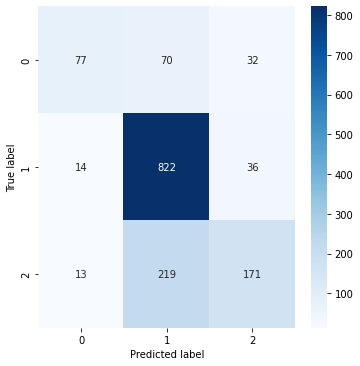

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
 #sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",learner.predict(vect.transform([instance])))

lemminkainen talo oy lahti office significant logistics business premise constructor
Label: neutral
Predicted Label:  ['neutral']


In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",learner.predict(vect.transform([instance])))

water treatment product australia today global research data service going publish market analysis market chemical water treatment product australia
Label: neutral
Predicted Label:  ['neutral']


In [ ]:
%%time
pipeline = Pipeline([
    ('vect', CountVectorizer()),  # feature extraction
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

classifier = pipeline.fit(x_train,y_train)
predictions = classifier.predict(x_test)
correct = 0
for prediction,true_label in zip(predictions, y_test):
    if prediction==true_label:
        correct += 1
print(correct/len(predictions))

0.7372764786795049
CPU times: user 153 ms, sys: 0 ns, total: 153 ms
Wall time: 159 ms


In [ ]:
print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

    negative       0.76      0.41      0.53       179
     neutral       0.74      0.96      0.83       872
    positive       0.73      0.41      0.52       403

    accuracy                           0.74      1454
   macro avg       0.74      0.59      0.63      1454
weighted avg       0.74      0.74      0.71      1454

Confusion matrix:
[[ 74  71  34]
 [ 10 834  28]
 [ 14 225 164]]


#Binary Classification

## 50 Agree

In [ ]:
#load train e test
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_50Agree_binary.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set_binary.txt'
delimiter = ','

In [ ]:
#train / test split
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])

In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(1385, 1385, 582, 582)

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((582, 741), (1385, 741))

In [ ]:
# feature selection
bin_sel = SelectKBest(chi2, k='all')  
bin_sel.fit(X_train_tok,y_train)
X_train_sel_bin = bin_sel.transform(X_train_tok)
X_test_sel_bin = bin_sel.transform(X_test_tok)

In [ ]:
tfidf = TfidfTransformer()  # weighting
tfidf.fit(X_train_sel_bin)
X_train_vec_bin = tfidf.transform(X_train_sel_bin)
X_test_vec_bin =tfidf.transform(X_test_sel_bin)

In [ ]:
%%time
svm_bin = LinearSVC()  # linear svm with default parameters
svm_bin_clf = svm_bin.fit(X_train_vec_bin,y_train)
bin_predictions = svm_bin_clf.predict(X_test_vec_bin)

CPU times: user 7.57 ms, sys: 43 µs, total: 7.61 ms
Wall time: 7.68 ms


In [ ]:
print('Classification report:')
print(classification_report(y_test, bin_predictions))
cm = confusion_matrix(y_test, bin_predictions)


Classification report:
              precision    recall  f1-score   support

    negative       0.80      0.64      0.71       179
    positive       0.85      0.93      0.89       403

    accuracy                           0.84       582
   macro avg       0.83      0.79      0.80       582
weighted avg       0.84      0.84      0.83       582



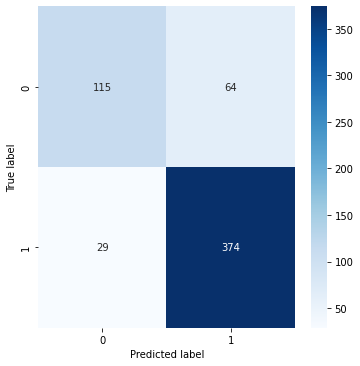

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",svm_bin.predict(vect.transform([instance])))

web user click link contained mail find bogus site imitates bank retrieves personal banking data
Label: negative
Predicted Label:  ['positive']


In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",svm_bin.predict(vect.transform([instance])))

australian company mirabela nickel awarded outokumpu technology contract grinding technology nickel sulfide project bahia state brazil
Label: positive
Predicted Label:  ['positive']


In [ ]:
%%time
bin_pipeline = Pipeline([
    ('vect', CountVectorizer()),  # feature extraction
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

bin_pipeline.fit(x_train,y_train)
bin_predictions = bin_pipeline.predict(x_test)
correct = 0
for prediction,true_label in zip(bin_predictions, y_test):
    if prediction==true_label:
        correct += 1
print(correct/len(bin_predictions))

0.8316151202749141
CPU times: user 105 ms, sys: 0 ns, total: 105 ms
Wall time: 127 ms


In [ ]:
print('Classification report:')
print(classification_report(y_test, bin_predictions))
cm = confusion_matrix(y_test, bin_predictions)


Classification report:
              precision    recall  f1-score   support

    negative       0.77      0.64      0.70       179
    positive       0.85      0.92      0.88       403

    accuracy                           0.83       582
   macro avg       0.81      0.78      0.79       582
weighted avg       0.83      0.83      0.83       582



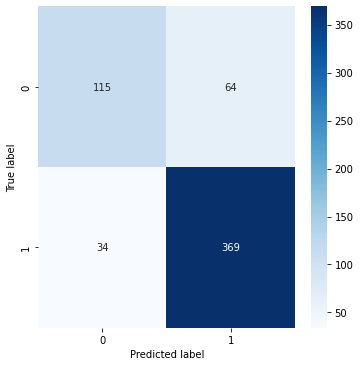

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
## Inspecting the pipeline
#We can have a look at the parameters of the supervised method of the pipeline to understand how it determines its classification decisions.
tokenizer = bin_pipeline.named_steps['vect']
selector = bin_pipeline.named_steps['sel']
classifier = bin_pipeline.named_steps['learner']

In [ ]:
#First we look at the feature selection function.
#We get the chi^2 score assigned to every feature.feature_names = tokenizer.get_feature_names_out()

feats_w_score = list()
for index,(selected,score) in enumerate(zip(selector.get_support(),selector.scores_)):
    feats_w_score.append((score,selected,feature_names[index]))
feats_w_score = sorted(feats_w_score)
len(feats_w_score)

4583

In [ ]:
#100 more informative features
feats_w_score[:100],feats_w_score[-100:]

([(0.00023638469149126244, True, 'sale'),
  (0.001402019140989742, True, 'last'),
  (0.0022120098039215544, True, 'around'),
  (0.0022120098039215544, True, 'property'),
  (0.0022120098039215544, True, 'since'),
  (0.002393535539215693, True, 'current'),
  (0.004424019607843109, True, 'end'),
  (0.004424019607843109, True, 'may'),
  (0.006636029411764665, True, 'expected'),
  (0.007638172227955602, True, 'million'),
  (0.009885620915032669, True, '005'),
  (0.009885620915032669, True, '02'),
  (0.009885620915032669, True, '103'),
  (0.009885620915032669, True, '110'),
  (0.009885620915032669, True, '122'),
  (0.009885620915032669, True, '131'),
  (0.009885620915032669, True, '164'),
  (0.009885620915032669, True, '167'),
  (0.009885620915032669, True, '171'),
  (0.009885620915032669, True, '203'),
  (0.009885620915032669, True, '37'),
  (0.009885620915032669, True, '54'),
  (0.009885620915032669, True, '73'),
  (0.009885620915032669, True, 'action'),
  (0.009885620915032669, True, 'act

In [ ]:
feats_w_classifier_weight = list()
for index,weight in enumerate(selector.inverse_transform(classifier.coef_)[0]):
    if weight!=0:
        feats_w_classifier_weight.append((weight,feature_names[index]))
feats_w_classifier_weight = sorted(feats_w_classifier_weight)
len(feats_w_classifier_weight)

4471

In [ ]:
#feature that most contribute to a positive decision
feats_w_classifier_weight[-100:]

[(0.5136464637492705, '545'),
 (0.5154037283783003, 'provider'),
 (0.5205005889975745, 'growing'),
 (0.5211057073621189, 'nordea'),
 (0.5226623746452961, 'provide'),
 (0.5232957032168856, 'measure'),
 (0.5235037318830754, 'ropax'),
 (0.5269799791844255, 'stronger'),
 (0.5291194853304506, 'tonne'),
 (0.5307423525952308, 'ee'),
 (0.5310383936825862, 'surged'),
 (0.5334859289842874, 'acg1v'),
 (0.5352278250678807, '686'),
 (0.5363036477400693, 'clothing'),
 (0.5377422623970957, 'set'),
 (0.5386644498409625, 'global'),
 (0.5407856105130963, 'versus'),
 (0.5425402748904793, 'diesel'),
 (0.5478235480313356, 'record'),
 (0.5479996295072683, 'januaryseptember'),
 (0.5499440123013581, 'oy'),
 (0.55011932794442, 'thursday'),
 (0.5506532639601723, 'continue'),
 (0.5603292839543811, 'plc'),
 (0.564825302515099, 'stake'),
 (0.5705476342589033, 'july'),
 (0.572112327239618, '40'),
 (0.5738907283222485, 'wafer'),
 (0.5772432982591592, 'strategy'),
 (0.578725671680387, 'contracted'),
 (0.5833789864453

In [ ]:
#features that most contribute to a negative decision.
feats_w_classifier_weight[:100]

[(-3.780057340218945, 'decreased'),
 (-3.4776534307146805, 'fell'),
 (-2.268668214306824, 'lower'),
 (-2.0300203731751405, 'dropped'),
 (-2.000467557135983, 'declined'),
 (-1.584949817171067, 'result'),
 (-1.4678835441065035, 'fall'),
 (-1.3959043942546034, 'cut'),
 (-1.3650779093579783, 'layoff'),
 (-1.319118455121791, 'slipped'),
 (-1.2507569312916496, 'due'),
 (-1.2207802487394699, 'staff'),
 (-1.197548710381152, 'warning'),
 (-1.1843328289990667, 'worker'),
 (-1.1371672656229697, 'weak'),
 (-1.135511806025879, 'scanfil'),
 (-1.1345827191988056, 'lay'),
 (-1.1279612167195718, 'employee'),
 (-1.0928969316612602, 'half'),
 (-1.074535253012755, 'canceled'),
 (-1.0127787986815426, 'low'),
 (-0.9936201885624636, 'saw'),
 (-0.9918462517647124, 'personnel'),
 (-0.9386645874492445, 'added'),
 (-0.9349778824169794, '118'),
 (-0.9315552464599611, 'first'),
 (-0.926975559680132, 'change'),
 (-0.9221980206912553, 'union'),
 (-0.9005411329643992, 'job'),
 (-0.8995316108656954, 'uncertainty'),
 (

## 66 Agree

In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_66Agree_binary.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set_binary.txt'
delimiter = ','

In [ ]:
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])

In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(1189, 1189, 582, 582)

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((582, 627), (1189, 627))

In [ ]:
vect.inverse_transform(X_train_tok[0,:])

[array(['news'], dtype='<U16')]

In [ ]:
# feature selection
bin_sel = SelectKBest(chi2, k='all')  
bin_sel.fit(X_train_tok,y_train)
X_train_sel_bin = bin_sel.transform(X_train_tok)
X_test_sel_bin = bin_sel.transform(X_test_tok)

In [ ]:
tfidf = TfidfTransformer()  # weighting
tfidf.fit(X_train_sel_bin)
X_train_vec_bin = tfidf.transform(X_train_sel_bin)
X_test_vec_bin =tfidf.transform(X_test_sel_bin)

In [ ]:
%%time
svm_bin = LinearSVC()  # linear svm with default parameters
svm_bin_clf = svm_bin.fit(X_train_vec_bin,y_train)
bin_predictions = svm_bin_clf.predict(X_test_vec_bin)

CPU times: user 14.1 ms, sys: 815 µs, total: 15 ms
Wall time: 40.5 ms


In [ ]:
print('Classification report:')
print(classification_report(y_test, bin_predictions))
cm = confusion_matrix(y_test, bin_predictions)


Classification report:
              precision    recall  f1-score   support

    negative       0.76      0.62      0.68       179
    positive       0.84      0.91      0.88       403

    accuracy                           0.82       582
   macro avg       0.80      0.77      0.78       582
weighted avg       0.82      0.82      0.82       582



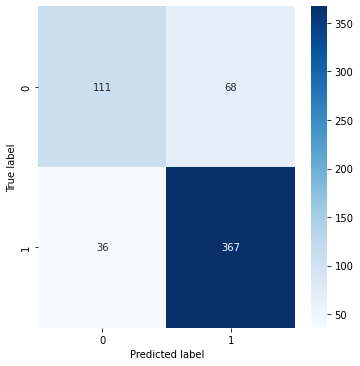

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",svm_bin.predict(vect.transform([instance])))

insurer axa par c slid 535 eur 1415 citigroup ing slashed target stock
Label: negative
Predicted Label:  ['positive']


In [ ]:
#sentiment prediction on random tweet

value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",svm_bin.predict(vect.transform([instance])))

operating profit eur 114 mn eur 75 mn
Label: positive
Predicted Label:  ['positive']


In [ ]:
%%time
bin_pipeline = Pipeline([
    ('vect', CountVectorizer()),  # feature extraction
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

bin_pipeline.fit(x_train,y_train)
bin_predictions = bin_pipeline.predict(x_test)
correct = 0
for prediction,true_label in zip(bin_predictions, y_test):
    if prediction==true_label:
        correct += 1
print(correct/len(bin_predictions))

0.8350515463917526
CPU times: user 90.4 ms, sys: 637 µs, total: 91 ms
Wall time: 116 ms


In [ ]:
print('Classification report:')
print(classification_report(y_test, bin_predictions))
cm = confusion_matrix(y_test, bin_predictions)

Classification report:
              precision    recall  f1-score   support

    negative       0.79      0.63      0.70       179
    positive       0.85      0.93      0.89       403

    accuracy                           0.84       582
   macro avg       0.82      0.78      0.79       582
weighted avg       0.83      0.84      0.83       582



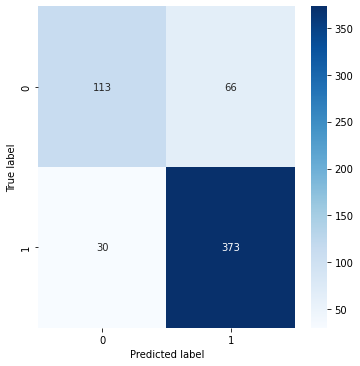

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
tokenizer = bin_pipeline.named_steps['vect']
selector = bin_pipeline.named_steps['sel']
classifier = bin_pipeline.named_steps['learner']

In [ ]:
feature_names = tokenizer.get_feature_names_out()
feats_w_score = list()
for index,(selected,score) in enumerate(zip(selector.get_support(),selector.scores_)):
    feats_w_score.append((score,selected,feature_names[index]))
feats_w_score = sorted(feats_w_score)
len(feats_w_score)

4052

In [ ]:
#100 more informative features
feats_w_score[:100],feats_w_score[-100:]

([(0.009467178574772929, True, 'already'),
  (0.009467178574772929, True, 'around'),
  (0.009467178574772929, True, 'property'),
  (0.009467178574772929, True, 'since'),
  (0.009467178574772929, True, 'swedish'),
  (0.009467178574772929, True, 'target'),
  (0.01413321204500154, True, '005'),
  (0.01413321204500154, True, '06'),
  (0.01413321204500154, True, '103'),
  (0.01413321204500154, True, '110'),
  (0.01413321204500154, True, '122'),
  (0.01413321204500154, True, '131'),
  (0.01413321204500154, True, '164'),
  (0.01413321204500154, True, '167'),
  (0.01413321204500154, True, '171'),
  (0.01413321204500154, True, '200'),
  (0.01413321204500154, True, '203'),
  (0.01413321204500154, True, '37'),
  (0.01413321204500154, True, '39'),
  (0.01413321204500154, True, '42'),
  (0.01413321204500154, True, '54'),
  (0.01413321204500154, True, '73'),
  (0.01413321204500154, True, 'action'),
  (0.01413321204500154, True, 'activity'),
  (0.01413321204500154, True, 'additional'),
  (0.014133212

In [ ]:
feats_w_classifier_weight = list()
for index,weight in enumerate(selector.inverse_transform(classifier.coef_)[0]):
    if weight!=0:
        feats_w_classifier_weight.append((weight,feature_names[index]))
feats_w_classifier_weight = sorted(feats_w_classifier_weight)
len(feats_w_classifier_weight)

2176

In [ ]:
#feature that most contribute to a positive decision
feats_w_classifier_weight[-100:]


[(1.3552527156068805e-20, 'secondquarter'),
 (1.3552527156068805e-20, 'vuorenmaa'),
 (1.9481757786848908e-20, '091'),
 (1.9481757786848908e-20, '092'),
 (1.9481757786848908e-20, '251867'),
 (1.9481757786848908e-20, '471119'),
 (2.1175823681357508e-20, 'cap'),
 (2.371692252312041e-20, 'sustainable'),
 (2.710505431213761e-20, 'danske'),
 (2.710505431213761e-20, 'flight'),
 (3.3881317890172014e-20, 'fiber'),
 (4.0657581468206416e-20, 'general'),
 (4.1504614415460717e-20, 'electronic'),
 (4.743384504624082e-20, 'logistics'),
 (4.743384504624082e-20, 'proud'),
 (4.8916152703935845e-20, 'ended'),
 (5.421010862427522e-20, 'accelerated'),
 (5.421010862427522e-20, 'kyronsalmi'),
 (5.421010862427522e-20, 'savonlinna'),
 (5.421010862427522e-20, 'strait'),
 (6.098637220230962e-20, 'mixed'),
 (6.352747104407253e-20, 'running'),
 (6.776263578034403e-20, 'industryleading'),
 (6.776263578034403e-20, 'leverage'),
 (8.131516293641283e-20, 'provided'),
 (9.825582188149884e-20, 'finnishness'),
 (9.8255821

In [ ]:
#feature that most contribute to a negative decision
feats_w_classifier_weight[100:]


[(-0.01970835666201505, 'swedishfinnish'),
 (-0.01970835666201505, 'underper'),
 (-0.01970835666201505, 'upm1v'),
 (-0.019577143235512958, 'handling'),
 (-0.01956447180625746, 'jan'),
 (-0.019208109350249213, 'acg1v'),
 (-0.019208109350249213, 'circuit'),
 (-0.019126233983865853, 'consultancy'),
 (-0.019013347612382412, '65'),
 (-0.018626813107595883, 'rating'),
 (-0.01854890626228272, 'announced'),
 (-0.01854737874589726, 'bn'),
 (-0.01842605146897675, 'nine'),
 (-0.01812603474188132, 'month'),
 (-0.017891235549477028, 'software'),
 (-0.017850981946566192, 'board'),
 (-0.01776320830038598, 'aspocomp'),
 (-0.017727116745759327, 'consulting'),
 (-0.017530743501939082, 'phone'),
 (-0.017515491902236727, 'upmkymmene'),
 (-0.01739588850418175, 'existing'),
 (-0.017268418375506942, '74'),
 (-0.01726422937408044, 'player'),
 (-0.017227750188717365, '52'),
 (-0.017185299636081498, '31'),
 (-0.017095455476653195, '10000'),
 (-0.017095455476653195, '189000'),
 (-0.017095455476653195, '245000'),

## 75 Agree

In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_75Agree_binary.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set_binary.txt'
delimiter = ','

In [ ]:
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])

In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(916, 916, 582, 582)

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((582, 477), (916, 477))

In [ ]:
vect.inverse_transform(X_train_tok[0,:])

[array(['news'], dtype='<U16')]

In [ ]:
# feature selection
bin_sel = SelectKBest(chi2, k='all')  
bin_sel.fit(X_train_tok,y_train)
X_train_sel_bin = bin_sel.transform(X_train_tok)
X_test_sel_bin = bin_sel.transform(X_test_tok)

In [ ]:
tfidf = TfidfTransformer()  # weighting
tfidf.fit(X_train_sel_bin)
X_train_vec_bin = tfidf.transform(X_train_sel_bin)
X_test_vec_bin =tfidf.transform(X_test_sel_bin)

In [ ]:
%%time
svm_bin = LinearSVC()  # linear svm with default parameters
svm_bin_clf = svm_bin.fit(X_train_vec_bin,y_train)
bin_predictions = svm_bin_clf.predict(X_test_vec_bin)

CPU times: user 11 ms, sys: 0 ns, total: 11 ms
Wall time: 54.6 ms


In [ ]:
print('Classification report:')
print(classification_report(y_test, bin_predictions))
cm = confusion_matrix(y_test, bin_predictions)

Classification report:
              precision    recall  f1-score   support

    negative       0.80      0.59      0.68       179
    positive       0.84      0.94      0.88       403

    accuracy                           0.83       582
   macro avg       0.82      0.76      0.78       582
weighted avg       0.83      0.83      0.82       582



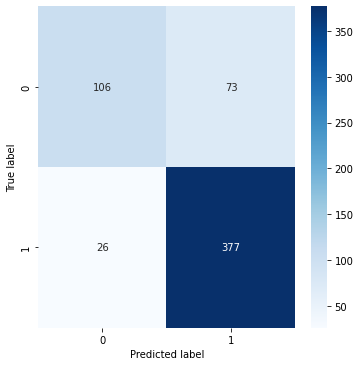

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",svm_bin.predict(vect.transform([instance])))

acquisition panostaja oyj expands business area specialising digital printing
Label: positive
Predicted Label:  ['positive']


In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",svm_bin.predict(vect.transform([instance])))

competition received great enthusiasm employee go
Label: positive
Predicted Label:  ['negative']


In [ ]:
%%time
bin_pipeline = Pipeline([
    ('vect', CountVectorizer()),  # feature extraction
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

bin_pipeline.fit(x_train,y_train)
bin_predictions = bin_pipeline.predict(x_test)
correct = 0
for prediction,true_label in zip(bin_predictions, y_test):
    if prediction==true_label:
        correct += 1
print(correct/len(bin_predictions))

0.8178694158075601
CPU times: user 77.4 ms, sys: 2.66 ms, total: 80.1 ms
Wall time: 102 ms


In [ ]:
print('Classification report:')
print(classification_report(y_test, bin_predictions))
cm = confusion_matrix(y_test, bin_predictions)

Classification report:
              precision    recall  f1-score   support

    negative       0.80      0.55      0.65       179
    positive       0.82      0.94      0.88       403

    accuracy                           0.82       582
   macro avg       0.81      0.74      0.76       582
weighted avg       0.82      0.82      0.81       582



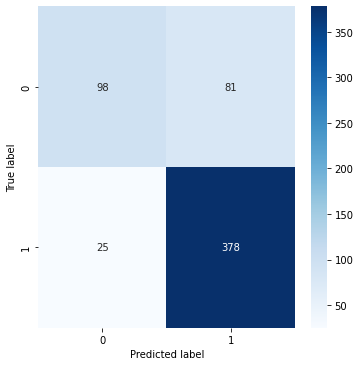

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
tokenizer = bin_pipeline.named_steps['vect']
selector = bin_pipeline.named_steps['sel']
classifier = bin_pipeline.named_steps['learner']

In [ ]:
feature_names = tokenizer.get_feature_names_out()
feats_w_score = list()
for index,(selected,score) in enumerate(zip(selector.get_support(),selector.scores_)):
    feats_w_score.append((score,selected,feature_names[index]))
feats_w_score = sorted(feats_w_score)
len(feats_w_score)

3221

In [ ]:
#100 more informative features
feats_w_score[:100],feats_w_score[-100:]

([(0.005651701546261643, True, '005'),
  (0.005651701546261643, True, '06'),
  (0.005651701546261643, True, '103'),
  (0.005651701546261643, True, '110'),
  (0.005651701546261643, True, '122'),
  (0.005651701546261643, True, '131'),
  (0.005651701546261643, True, '164'),
  (0.005651701546261643, True, '167'),
  (0.005651701546261643, True, '171'),
  (0.005651701546261643, True, '203'),
  (0.005651701546261643, True, '37'),
  (0.005651701546261643, True, '39'),
  (0.005651701546261643, True, '42'),
  (0.005651701546261643, True, '54'),
  (0.005651701546261643, True, '60'),
  (0.005651701546261643, True, '73'),
  (0.005651701546261643, True, '85'),
  (0.005651701546261643, True, 'activity'),
  (0.005651701546261643, True, 'agricultural'),
  (0.005651701546261643, True, 'around'),
  (0.005651701546261643, True, 'completed'),
  (0.005651701546261643, True, 'consumer'),
  (0.005651701546261643, True, 'consumption'),
  (0.005651701546261643, True, 'controlled'),
  (0.005651701546261643, True

In [ ]:
feats_w_classifier_weight = list()
for index,weight in enumerate(selector.inverse_transform(classifier.coef_)[0]):
    if weight!=0:
        feats_w_classifier_weight.append((weight,feature_names[index]))
feats_w_classifier_weight = sorted(feats_w_classifier_weight)
len(feats_w_classifier_weight)

1895

In [ ]:
#feature that most contribute to a positive decision
feats_w_classifier_weight[-100:]

[(5.421010862427522e-20, 'bhushan'),
 (5.421010862427522e-20, 'decline'),
 (5.421010862427522e-20, 'denmark'),
 (5.421010862427522e-20, 'grupe'),
 (5.421010862427522e-20, 'hot'),
 (5.421010862427522e-20, 'kalnapiliotauro'),
 (5.421010862427522e-20, 'kalnapilistauras'),
 (5.421010862427522e-20, 'kci'),
 (5.421010862427522e-20, 'kemira'),
 (5.421010862427522e-20, 'ladle'),
 (5.421010862427522e-20, 'mexico'),
 (5.421010862427522e-20, 'mortar'),
 (5.421010862427522e-20, 'precision'),
 (5.421010862427522e-20, 'seven'),
 (5.421010862427522e-20, 'strip'),
 (5.421010862427522e-20, 'unibrew'),
 (6.098637220230962e-20, 'citi'),
 (6.098637220230962e-20, 'custody'),
 (6.098637220230962e-20, 'dirk'),
 (6.098637220230962e-20, 'jones'),
 (6.437450399132683e-20, 'threemonth'),
 (1.0842021724855044e-19, '255'),
 (1.0842021724855044e-19, '659'),
 (1.0842021724855044e-19, 'anticipated'),
 (1.0842021724855044e-19, 'eur59'),
 (1.0842021724855044e-19, 'four'),
 (1.0842021724855044e-19, 'gran'),
 (1.08420217

In [ ]:
#features that most contribute to a negative decision.
feats_w_classifier_weight[:100]

[(-0.1647027547062948, 'adp'),
 (-0.13145829948205895, 'usd'),
 (-0.1174974265489829, 'oyj'),
 (-0.11306224405924321, 'today'),
 (-0.10347059440164932, 'eur'),
 (-0.09435639833883429, 'million'),
 (-0.09128860311213025, 'hel'),
 (-0.08693575948082702, 'finnish'),
 (-0.080691307153601, '2008'),
 (-0.07579713805894064, '2009'),
 (-0.07466847003008359, 'said'),
 (-0.06189524187101478, 'compare'),
 (-0.06189524187101478, 'measured'),
 (-0.06189524187101478, 'regional'),
 (-0.061444965892343814, 'feb'),
 (-0.058374408433453796, '349'),
 (-0.058374408433453796, 'kilometer'),
 (-0.058374408433453796, 'section'),
 (-0.055876337354536516, 'asian'),
 (-0.05424155123380835, 'traffic'),
 (-0.04670634862329205, 'finnair'),
 (-0.046657092155348814, 'omx'),
 (-0.0463365994004973, 'august'),
 (-0.044998040651284835, 'passenger'),
 (-0.04493684048711768, 'net'),
 (-0.04383852832158005, 'demand'),
 (-0.0409643131984235, 'maker'),
 (-0.037789558492874076, 'last'),
 (-0.03778324047728815, 'company'),
 (-0

## All Agree

In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_AllAgree_binary.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set_binary.txt'
delimiter = ','

In [ ]:
x_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_train.append(row[1])
        y_train.append(row[0])

x_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        x_test.append(row[1])
        y_test.append(row[0])

In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(618, 618, 582, 582)

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

print('fit')
vect.fit(x_train)
print('transform')
X_train_tok = vect.transform(x_train)
print('done')

X_test_tok =vect.transform(x_test).toarray()
x_train_tok = vect.transform(x_train).toarray()

fit
transform
done


In [ ]:
X_test_tok.shape, x_train_tok.shape

((582, 298), (618, 298))

In [ ]:
vect.inverse_transform(X_train_tok[0,:])

[array(['news'], dtype='<U16')]

In [ ]:
# feature selection
bin_sel = SelectKBest(chi2, k='all')  
bin_sel.fit(X_train_tok,y_train)
X_train_sel_bin = bin_sel.transform(X_train_tok)
X_test_sel_bin = bin_sel.transform(X_test_tok)

In [ ]:
tfidf = TfidfTransformer()  # weighting
tfidf.fit(X_train_sel_bin)
X_train_vec_bin = tfidf.transform(X_train_sel_bin)
X_test_vec_bin =tfidf.transform(X_test_sel_bin)

In [ ]:
%%time
svm_bin = LinearSVC()  # linear svm with default parameters
svm_bin_clf = svm_bin.fit(X_train_vec_bin,y_train)
bin_predictions = svm_bin_clf.predict(X_test_vec_bin)

CPU times: user 8.86 ms, sys: 120 µs, total: 8.98 ms
Wall time: 22.7 ms


In [ ]:
print('Classification report:')
print(classification_report(y_test, bin_predictions))
cm = confusion_matrix(y_test, bin_predictions)

Classification report:
              precision    recall  f1-score   support

    negative       0.71      0.53      0.61       179
    positive       0.81      0.90      0.86       403

    accuracy                           0.79       582
   macro avg       0.76      0.72      0.73       582
weighted avg       0.78      0.79      0.78       582



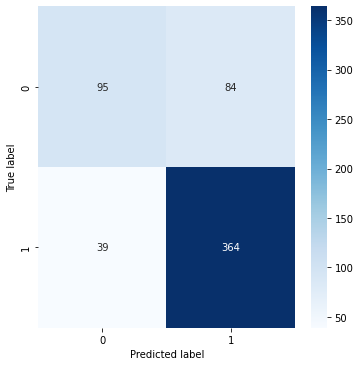

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",svm_bin.predict(vect.transform([instance])))

full 2010 company expects net sale operating result improve previous year saying positive operating result amount depend order intake end summer
Label: positive
Predicted Label:  ['positive']


In [ ]:
#sentiment prediction on random tweet
value = randint(0,500) 
instance = x_test[value]
label = y_test[value]

print(instance)
print("Label:", label)
print("Predicted Label: ",svm_bin.predict(vect.transform([instance])))

sale volume cocacola market share decreased 22 242
Label: negative
Predicted Label:  ['negative']


In [ ]:
%%time
bin_pipeline = Pipeline([
    ('vect', CountVectorizer()),  # feature extraction
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

bin_pipeline.fit(x_train,y_train)
bin_predictions = bin_pipeline.predict(x_test)
correct = 0
for prediction,true_label in zip(bin_predictions, y_test):
    if prediction==true_label:
        correct += 1
print(correct/len(bin_predictions))

0.802405498281787
CPU times: user 63.1 ms, sys: 316 µs, total: 63.4 ms
Wall time: 64.4 ms


In [ ]:
print('Classification report:')
print(classification_report(y_test, bin_predictions))
cm = confusion_matrix(y_test, bin_predictions)


Classification report:
              precision    recall  f1-score   support

    negative       0.79      0.49      0.60       179
    positive       0.81      0.94      0.87       403

    accuracy                           0.80       582
   macro avg       0.80      0.71      0.74       582
weighted avg       0.80      0.80      0.79       582



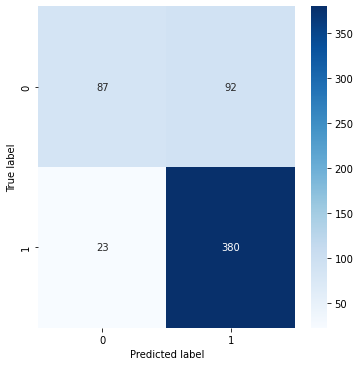

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
tokenizer = bin_pipeline.named_steps['vect']
selector = bin_pipeline.named_steps['sel']
classifier = bin_pipeline.named_steps['learner']

In [ ]:
feature_names = tokenizer.get_feature_names_out()
feats_w_score = list()
for index,(selected,score) in enumerate(zip(selector.get_support(),selector.scores_)):
    feats_w_score.append((score,selected,feature_names[index]))
feats_w_score = sorted(feats_w_score)
len(feats_w_score)

2223

In [ ]:
#100 more informative features
feats_w_score[:100],feats_w_score[-100:]

([(0.007281834836854441, True, '06'),
  (0.007281834836854441, True, '103'),
  (0.007281834836854441, True, '114'),
  (0.007281834836854441, True, '117'),
  (0.007281834836854441, True, '122'),
  (0.007281834836854441, True, '164'),
  (0.007281834836854441, True, '167'),
  (0.007281834836854441, True, '171'),
  (0.007281834836854441, True, '203'),
  (0.007281834836854441, True, '26'),
  (0.007281834836854441, True, '49'),
  (0.007281834836854441, True, '50'),
  (0.007281834836854441, True, '54'),
  (0.007281834836854441, True, '85'),
  (0.007281834836854441, True, '96'),
  (0.007281834836854441, True, 'activity'),
  (0.007281834836854441, True, 'addition'),
  (0.007281834836854441, True, 'affecto'),
  (0.007281834836854441, True, 'analyst'),
  (0.007281834836854441, True, 'asa'),
  (0.007281834836854441, True, 'brand'),
  (0.007281834836854441, True, 'carrier'),
  (0.007281834836854441, True, 'china'),
  (0.007281834836854441, True, 'combined'),
  (0.007281834836854441, True, 'controll

In [ ]:
feats_w_classifier_weight = list()
for index,weight in enumerate(selector.inverse_transform(classifier.coef_)[0]):
    if weight!=0:
        feats_w_classifier_weight.append((weight,feature_names[index]))
feats_w_classifier_weight = sorted(feats_w_classifier_weight)
len(feats_w_classifier_weight)

1381

In [ ]:
#feature that most contribute to a positive decision
feats_w_classifier_weight[-100:]

[(-1.0842021724855044e-19, 'outokumpu'),
 (-1.0842021724855044e-19, 'processing'),
 (-8.131516293641283e-20, 'cover'),
 (-8.131516293641283e-20, 'established'),
 (-8.131516293641283e-20, 'interoperability'),
 (-8.131516293641283e-20, 'mformation'),
 (-8.131516293641283e-20, 'noted'),
 (-8.131516293641283e-20, 'proven'),
 (-8.131516293641283e-20, 'standardsbased'),
 (-6.776263578034403e-20, 'book'),
 (-5.421010862427522e-20, 'confirmed'),
 (-5.421010862427522e-20, 'especially'),
 (-5.421010862427522e-20, 'eur10'),
 (-5.421010862427522e-20, 'eur93'),
 (-5.421010862427522e-20, 'interim'),
 (-5.421010862427522e-20, 'yearago'),
 (-4.743384504624082e-20, '15'),
 (-4.743384504624082e-20, '23335'),
 (-4.743384504624082e-20, '608'),
 (-4.743384504624082e-20, 'aero'),
 (-4.743384504624082e-20, 'southern'),
 (-4.743384504624082e-20, 'tallinnbased'),
 (-3.8963515573697816e-20, 'declined'),
 (-1.3552527156068805e-20, 'anticipated'),
 (-6.776263578034403e-21, 'medium'),
 (-2.964615315390051e-21, 'il

In [ ]:
#features that most contribute to a negative decision.
feats_w_classifier_weight[:100]

[(-0.15459181104622055, 'adp'),
 (-0.13587510736632416, 'usd'),
 (-0.10702602887100109, 'today'),
 (-0.10445088196289525, 'eur'),
 (-0.10128408762764066, 'oyj'),
 (-0.09924068934750538, 'million'),
 (-0.0867014147567464, 'finnish'),
 (-0.08575295230104125, 'said'),
 (-0.08254241833127379, '2008'),
 (-0.0743452341654035, 'hel'),
 (-0.07266562467042655, '2009'),
 (-0.06666934441449408, 'feb'),
 (-0.0593607241433312, 'compare'),
 (-0.0593607241433312, 'kilometer'),
 (-0.0593607241433312, 'measured'),
 (-0.0593607241433312, 'regional'),
 (-0.0593607241433312, 'section'),
 (-0.05578702671226643, '349'),
 (-0.05578702671226643, 'traffic'),
 (-0.05578702671226642, 'asian'),
 (-0.05003025257669894, 'omx'),
 (-0.048431694966893764, 'net'),
 (-0.046436741391510376, 'finnair'),
 (-0.04610405317092276, 'demand'),
 (-0.045175424303450416, 'august'),
 (-0.04406769736729815, 'company'),
 (-0.04398080614500754, 'passenger'),
 (-0.04064638028083637, 'deliver'),
 (-0.03978180122966629, 'last'),
 (-0.039